In [1]:
import numpy as np
import copy 
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.datasets.samples_generator import make_blobs
import sklearn.linear_model
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import import_ipynb
from HelperFunctions import relu,sigmoid,loss,L2_loss,gradient_descent_with_momentum,gradient_descent_normal,rmsprop,adam
np.random.seed(1) # set a seed so that the results are consistent
#from ipynb.fs.full.HelperFunctions import *

importing Jupyter notebook from HelperFunctions.ipynb
Sigmoid at 0 is 0.5
relu at 0 is 0
relu at -ve is 0
relu at +ve is [[0 0 1 2]
 [0 0 0 0]]
-0.1364872931134815
0.5773502691896257
importing Jupyter notebook from HelperFunctions.ipynb
Sigmoid at 0 is 0.5
relu at 0 is 0
relu at -ve is 0
relu at +ve is [[0 0 1 2]
 [0 0 0 0]]
-0.1364872931134815
0.5773502691896257


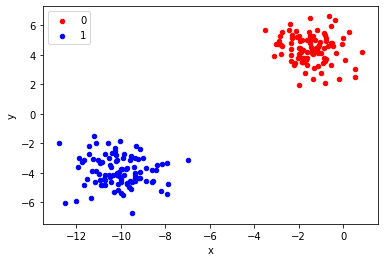

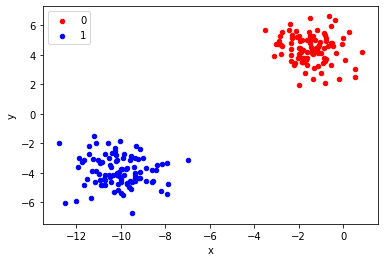

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, Y = make_blobs(n_samples=200, centers=2, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


In [3]:
#data_to_test the algorithm
'''from sklearn.datasets import load_iris
data=load_iris()
X=data.data
Y=data.target'''
#Y[Y>0]=1
feature_mean=np.mean(X,axis=0)
feature_SD=np.std(X,axis=0)
X=(X-feature_mean)/feature_SD
X
Y

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0])

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0])

In [4]:
Y.reshape((Y.shape[0],1))
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(134, 2)
(66, 2)
(134,)
(66,)
(134, 2)
(66, 2)
(134,)
(66,)


In [5]:
x_train=x_train.T
x_test=x_test.T
y_train=y_train.reshape((y_train.shape[0],1))
y_train=y_train.T
y_test=y_test.reshape((y_test.shape[0],1))
y_test=y_test.T
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2, 134)
(2, 66)
(1, 134)
(1, 66)
(2, 134)
(2, 66)
(1, 134)
(1, 66)


In [18]:
#Intialize Model Parameters

class MultiLayerNueralNet():
    
    
    def __init__(self,num_input,num_hidden,num_output):
        
        """
        
        intialize class  instance variables 
        Argument:
        num_input -- size of the input layer
        num_hidden -- size of the hidden layer
        num_ouput -- size of the output layer
        
        """
        np.random.seed(2)
        self.num_input=num_input
        self.num_hidden=num_hidden
        self.num_output=num_output
        self.W1=np.random.rand(num_hidden,num_input)
        self.W2=np.random.rand(num_output,num_hidden)*0.01
        self.b1=np.zeros((num_hidden,1))
        self.b2=np.zeros((num_output,1))
        self.cache={"Z1": None,"A1": None,"Z2": None,"A2": None}
        self.grad_cache={"dW1": None,"dW2": None,"db1": None,"db2": None}
        self.exponential_weighted_grad_params={"dW1":0,"dW2":0,"db1":0,"db2":0}
        self.rms_prop_params={"dSW1":0,"dSW2":0,"dSb1":0,"dSb2":0}
    
    def forward_propgation(self,X):
        
        #LINEAR->RELU->LINEAR->SIGMOID
        
        W1=self.W1
        W2=self.W2
        b1=self.b1
        b2=self.b2
        Z1=np.dot(W1,X)+b1
        A1=relu(Z1)
        Z2=np.dot(W2,A1)+b2
        A2=sigmoid(Z2)
        self.cache["Z1"]=Z1
        self.cache["A1"]=A1
        self.cache["Z2"]=Z2
        self.cache["A2"]=A2
        return A2
    
    def forward_propgation_for_grad_check(self,X,parameters):
        
        #LINEAR->RELU->LINEAR->SIGMOID
        
        W1=parameters[:self.W1.size].reshape(self.W1.shape)
        W2=parameters[self.W1.size:self.W1.size+self.W2.size].reshape(self.W2.shape)
        b1=parameters[self.W1.size+self.W2.size:self.W1.size+self.W2.size+self.b1.size].reshape(self.b1.shape)
        b2=parameters[self.W1.size+self.W2.size+self.b1.size:self.W1.size+self.W2.size+self.b1.size+self.b2.size].reshape(self.b2.shape)
        assert(W1.shape==self.W1.shape)
        assert(W2.shape==self.W2.shape)
        assert(b1.shape==self.b1.shape)
        assert(b2.shape==self.b2.shape)
       
        Z1=np.dot(W1,X)+b1
        A1=relu(Z1)
        Z2=np.dot(W2,A1)+b2
        A2=sigmoid(Z2)
        self.cache["Z1"]=Z1
        self.cache["A1"]=A1
        self.cache["Z2"]=Z2
        self.cache["A2"]=A2
        return A2
    
    def backward_propagation(self,X,Y):
        
        #Y=np.eye(3)[Y.squeeze()].T
        m=X.shape[1]
        W1=self.W1
        W2=self.W2
        b1=self.b1
        b2=self.b2
        Z1=self.cache["Z1"]
        A1=self.cache["A1"]
        Z2=self.cache["Z2"]
        A2=self.cache["A2"]
        dZ2=(A2 - Y)
        dW2=(1./m)*np.dot(dZ2,A1.T)
        db2=(1./m)*np.sum(dZ2,axis=1, keepdims = True)
        #dZ1=np.dot(W2.T,dZ2)*A1*(1-A1)
        dZ1=np.multiply(np.dot(W2.T,dZ2),np.int64(A1 > 0))
        dW1=(1./m)*np.dot(dZ1,X.T)
        db1=(1./m)*np.sum(dZ1,axis=1, keepdims = True)
        self.grad_cache["dW1"]=dW1
        self.grad_cache["dW2"]=dW2
        self.grad_cache["db1"]=db1
        self.grad_cache["db2"]=db2
         
    def implement_gradient_check(self,X,y,epsilon=1e-7):
        
        grad_concat=np.concatenate((self.grad_cache["dW1"].flatten(),self.grad_cache["dW2"].flatten(),self.grad_cache["db1"].flatten(),self.grad_cache["db2"].flatten()))
        grad_concat=grad_concat.reshape((grad_concat.shape[0],1))
        grad_approx=np.zeros(grad_concat.size)
        grad_approx=grad_approx.reshape((grad_approx.shape[0],1))
        parameter_concat=np.concatenate((self.W1.flatten(),self.W2.flatten(),self.b1.flatten(),self.b2.flatten()))
        parameter_concat=parameter_concat.reshape((parameter_concat.shape[0],1))
        
        
        for i in range(parameter_concat.size): 
            
            parameter_concat_plus=copy.copy(parameter_concat)
            parameter_concat_minus=copy.copy(parameter_concat)
            parameter_concat_plus[i][0]=parameter_concat_plus[i][0]+epsilon
            parameter_concat_minus[i][0]=parameter_concat_minus[i][0]-epsilon
            A_plus=self.forward_propgation_for_grad_check(X,parameter_concat_plus)
            J_plus=loss(X.shape[1],A_plus,y)
            A_minus=self.forward_propgation_for_grad_check(X,parameter_concat_minus)
            J_minus=loss(X.shape[1],A_minus,y)
            grad_approx[i]=(J_plus-J_minus)/(2*epsilon)
    
    
        numerator = np.sum(np.sqrt(np.sum((grad_concat-grad_approx)**2)))                 # Step 1'
        denominator = np.sum(np.sqrt(np.sum((grad_concat)**2))+np.sqrt(np.sum((grad_approx)**2)))  # Step 2'
        difference = numerator/denominator    
    
        difference_1=np.sqrt(np.sum(((grad_approx-grad_concat)**2)))
        L2_1=np.sqrt(np.sum(((grad_approx)**2)))
        L2_2=np.sqrt(np.sum(((grad_concat)**2)))
        difference_1=difference_1/(L2_2+L2_1)
        print("the difference is",difference)
        return (difference, difference_1)
    
    #def Adam():   
    #def RMS prop 
    #gradient descent with momentum. 
    
    def train(self,x_train,y_train,x_test,y_test,num_iterations,gradient_name,learning_rate=0.1):
        
        train_loss=[]
        difference=[]
        test_loss=[]
        #y_train=np.eye(3)[y_train.squeeze()].T
        #y_test=np.eye(3)[y_test.squeeze()].T
        m_train=y_train.shape[1]
        m_test=y_test.shape[1]
        #one_hot_y=np.eye(3)[y_train]
        for i in range(num_iterations):
            
            self.forward_propgation(x_train)
            self.backward_propagation(x_train,y_train)
            
            params={"W1": self.W1,"W2": self.W2,"b1": self.b1,"b2": self.b2}
            
            if(gradient_name=="graident_descent"):
                grad_params=self.grad_cache
                self.W1,self.W2,self.b1,self.b2=gradient_descent_normal(grad_params,params,learning_rate)
                
            elif(gradient_name=="graident_descent_with_momentum"): 
                self.W1,self.W2,self.b1,self.b2,self.exponential_weighted_grad_params=gradient_descent_with_momentum(self.grad_cache,params,self.exponential_weighted_grad_params,learning_rate)
           
            elif(gradient_name=="rmsprop"): 
                self.W1,self.W2,self.b1,self.b2,self.rms_prop_params=rmsprop(self.grad_cache,params,self.rms_prop_params,learning_rate)
                
            elif(gradient_name=="adam"): 
                self.W1,self.W2,self.b1,self.b2,self.rms_prop_params,self.exponential_weighted_grad_params=adam(self.grad_cache,params,self.rms_prop_params,self.exponential_weighted_grad_params,learning_rate)
    
            if((i%10)==0):
                
                print("The train loss in"+ str(i)+"iterations is", loss(m_train,self.cache["A2"],y_train))
                train_loss.append(loss(m_train,self.cache["A2"],y_train))
                difference.append(self.implement_gradient_check(x_train,y_train))
                self.forward_propgation(x_test)
                #print("The val loss in"+ str(i)+"iterations is", L2_loss(m_test,self.cache["A2"],y_test))
                test_loss.append(loss(m_test,self.cache["A2"],y_test))
       
        print("The difference from gradient checking is",difference[-1])
        return train_loss,test_loss
    
    def predict(self,x):
        
        y_pred=self.forward_propgation(x_test)[0][0]
        if (y_pred>=0.5):
                return 1
        else: 
            return 0
        
    def accuracy(self,x,y,output_n):
        y_pred=self.forward_propgation(x)
        if (output_n==1):
            y_pred[y_pred>=0.5]=1
            y_pred[y_pred<0.5]=0
            return  y_pred,(np.sum(y_pred==y)/y.size)*100
        else:
            y_pred=np.argmax(y_pred,axis=0)
            return  y_pred,(np.sum(y_pred==y)/y.size)*100


        
        
        
        

In [19]:
nueralnet=MultiLayerNueralNet(x_train.shape[0],100,1)
A2=nueralnet.forward_propgation(x_train)
nueralnet.backward_propagation(x_train,y_train)
train_loss,test_loss=nueralnet.train(x_train,y_train,x_test,y_test,1000,"adam",0.01)

The train loss in0iterations is 0.8346473754858004
the difference is 0.23688648680893076
The train loss in10iterations is 0.31327346684331325
The train loss in0iterations is 0.8346473754858004
the difference is 0.23688648680893076
The train loss in10iterations is 0.31327346684331325
the difference is 0.005496828657336915
The train loss in20iterations is 0.2673027195087004
the difference is 0.006166625227446647
The train loss in30iterations is 0.22975034745495176
the difference is 0.005496828657336915
The train loss in20iterations is 0.2673027195087004
the difference is 0.006166625227446647
The train loss in30iterations is 0.22975034745495176
the difference is 0.005625284545333478
The train loss in40iterations is 0.20052620811923863
the difference is 0.005181828906614802
The train loss in50iterations is 0.17755524771679204
the difference is 0.005625284545333478
The train loss in40iterations is 0.20052620811923863
the difference is 0.005181828906614802
The train loss in50iterations is 0.

the difference is 0.002271250816216571
The train loss in440iterations is 0.016857408122210975
the difference is 0.0022626475912475978
The train loss in450iterations is 0.016100492568057553
the difference is 0.0022545303696106084
The train loss in460iterations is 0.01538057305458793
the difference is 0.0022468599979348376
The train loss in470iterations is 0.014695560028649626
the difference is 0.0022545303696106084
The train loss in460iterations is 0.01538057305458793
the difference is 0.0022468599979348376
The train loss in470iterations is 0.014695560028649626
the difference is 0.0022396313804354797
The train loss in480iterations is 0.014043508428315907
the difference is 0.0022327918849613868
The train loss in490iterations is 0.013422605233544764
the difference is 0.0022396313804354797
The train loss in480iterations is 0.014043508428315907
the difference is 0.0022327918849613868
The train loss in490iterations is 0.013422605233544764
the difference is 0.002226314216777212
The train loss

the difference is 0.002121797242345056
The train loss in880iterations is 0.0024688179930044685
the difference is 0.002120789350218871
The train loss in890iterations is 0.002366215333778084
the difference is 0.0021197527052892696
The train loss in900iterations is 0.0022679374269182553
the difference is 0.002118709816879465
The train loss in910iterations is 0.002173798136536772
the difference is 0.0021197527052892696
The train loss in900iterations is 0.0022679374269182553
the difference is 0.002118709816879465
The train loss in910iterations is 0.002173798136536772
the difference is 0.0021177347031080423
The train loss in920iterations is 0.0020836196990602998
the difference is 0.0021168022403979317
The train loss in930iterations is 0.001997232320264623
the difference is 0.0021177347031080423
The train loss in920iterations is 0.0020836196990602998
the difference is 0.0021168022403979317
The train loss in930iterations is 0.001997232320264623
the difference is 0.0021157712385205417
The train

In [20]:
L2_loss(y_train.shape[1],A2,y_train)

0.04880435800636223

0.04880435800636223

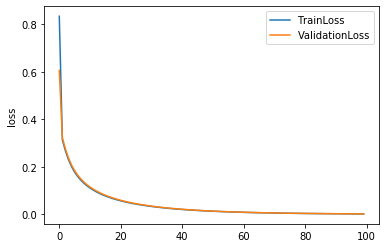

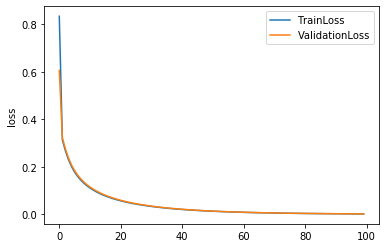

In [21]:
import matplotlib.pyplot as plt
plt.plot(train_loss,label="TrainLoss")
plt.plot(test_loss,label="ValidationLoss")
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
feature=np.array([-1.14452391, -1.19360307])
y_pred,accuracy=nueralnet.accuracy(x_test,y_test,1)
print(accuracy)

100.0
100.0


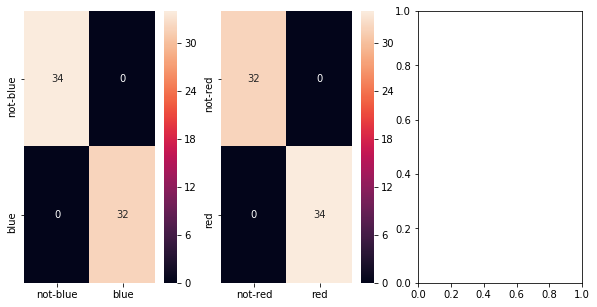

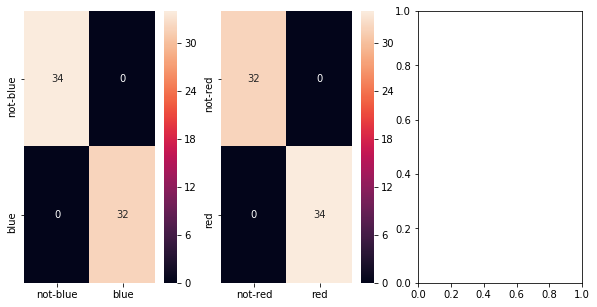

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [27]:
#confusion Matrix 
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
y_pred=y_pred.reshape((1,66))
y_true = y_test
fig, axes= plt.subplots(1,3,figsize=(10,5))
conf_array=multilabel_confusion_matrix((np.squeeze(y_test)).tolist(), (np.squeeze(y_pred)).tolist(), labels=[0,1])
#label_maps={"setosa":0,"veriscular":1,"virginica":2}
label_maps={"red":1,"blue":0}
for index in range(len(conf_array)): 
    keys_list=list(label_maps.keys())
    current_index_string=keys_list[list(label_maps.values()).index(index)]
    df_cm = pd.DataFrame(conf_array[index], index = [i for i in ['not-'+current_index_string, current_index_string]],
                      columns = [i for i in ['not-'+current_index_string, current_index_string]])
    plt.figure(figsize = (10,10))
    sn.heatmap(df_cm,ax=axes[index], annot=True)

In [25]:
from sklearn.metrics import precision_recall_fscore_support
result_tuple=precision_recall_fscore_support((np.squeeze(y_test)).tolist(), (np.squeeze(y_pred)).tolist(), average='weighted')
print("The Precision of the NueralNet for this dataset is",result_tuple[0])
print("The Recall of the NueralNet for this dataset is",result_tuple[1])
print("The F1 Score of the NueralNet for this dataset is",result_tuple[2]) 

The Precision of the NueralNet for this dataset is 1.0
The Recall of the NueralNet for this dataset is 1.0
The F1 Score of the NueralNet for this dataset is 1.0
The Precision of the NueralNet for this dataset is 1.0
The Recall of the NueralNet for this dataset is 1.0
The F1 Score of the NueralNet for this dataset is 1.0
